In [10]:
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

# Assuming you have ground truth labels (y_true) and predicted labels (y_pred)
# Replace these arrays with your actual data
y_true = np.array([np.random.randint(1,26)]*100)  # Ground truth labels
y_pred = np.array([np.random.randint(1,26)]*100)  # Predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate the macro F1 score
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f'Macro F1 Score: {macro_f1}')


Macro F1 Score: 0.0


In [11]:
y_pred

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

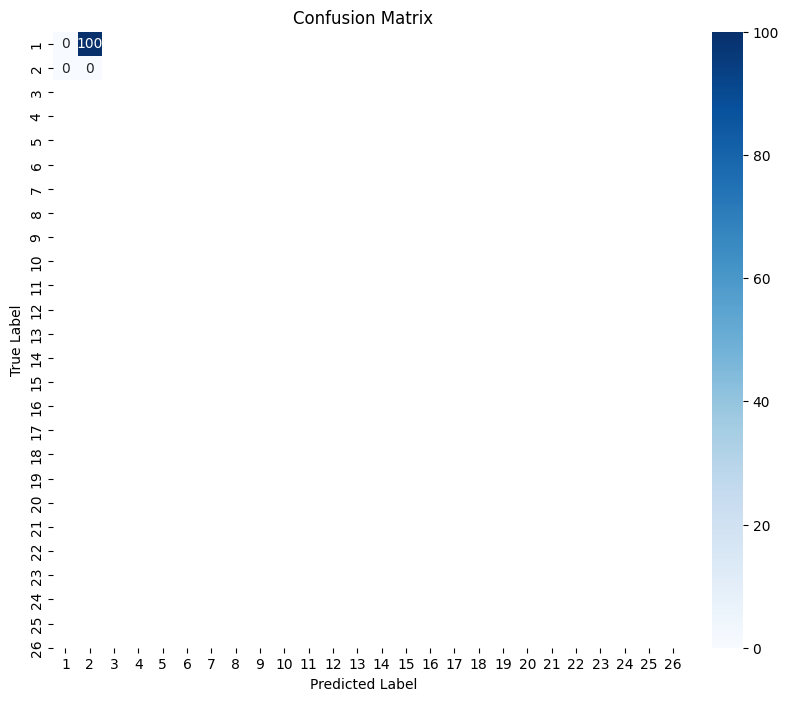

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 27), yticklabels=range(1, 27))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 330.3 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.8 kB 585.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.8 kB 876.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.1 MB/s eta 0:00:00


In [12]:
def dummy():
    return 3,4 

In [13]:
li = []
l3 = []



In [17]:
li,l3 = dummy()

In [18]:
li,l3

(3, 4)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Assuming you have ground truth labels (y_true_batches) and predicted labels (y_pred_batches) in batches
# Replace these arrays with your actual batched data
y_true_batches = [np.array([1, 2, 3,  26]), np.array([4, 5, 6, 26]),]  # Ground truth labels in batches
y_pred_batches = [np.array([1, 2, 3,  26]), np.array([4, 5, 6, 26]), ]  # Predicted labels in batches

# Accumulate true labels and predicted labels over batches
y_true = np.concatenate(y_true_batches)
y_pred = np.concatenate(y_pred_batches)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate the macro F1 score
macro_f1 = f1_score(y_true, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f'Macro F1 Score: {macro_f1}')
print(f'Accuracy: {accuracy}')


Macro F1 Score: 1.0
Accuracy: 1.0


In [24]:
from NN import * 
from preprocess import * 

model5 = NN()
model5.load(("model_Linear(784,1024)_ReLU_Dropout(30.0%)_Linear(1024,26)_Softmax_.pkl"))

X_train,y_train,X_test,y_test = preprocess_EMNIST() 

In [25]:
y_pred = np.argmax(model5(X_test.T),axis=0)
y_pred

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [26]:
y__ = y_test.T.argmax(axis=0)
y__

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print(f"{accuracy_score(y_true=y__,y_pred=y_pred)=}")

print(f"{f1_score(y__, y_pred, average='macro')=}")

accuracy_score(y_true=y__,y_pred=y_pred)=0.9061538461538462
f1_score(y__, y_pred, average='macro')=0.9062251956837695


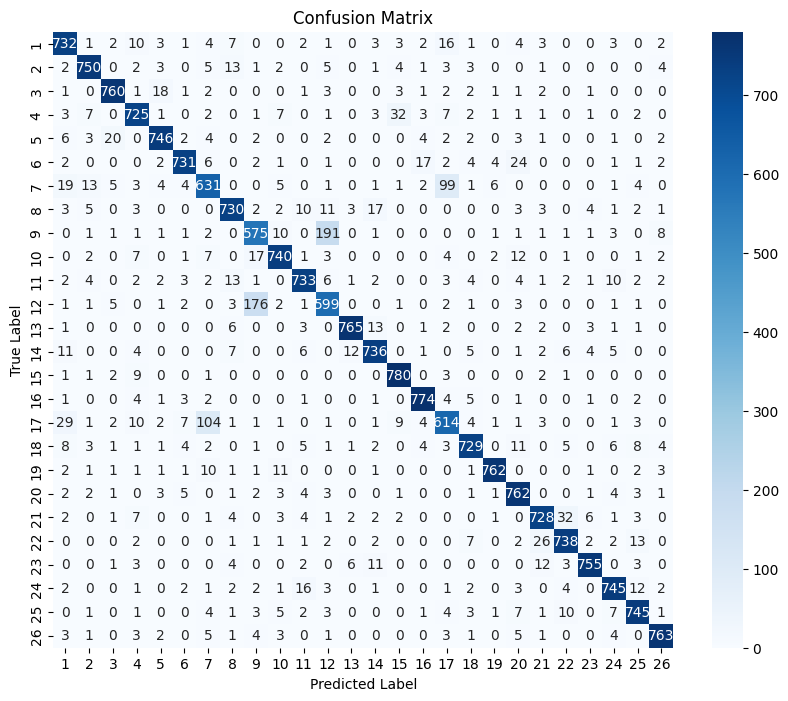

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y__, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 27), yticklabels=range(1, 27))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
def eval(model,X,y,batch_size=1024):
        num_batches = (len(X)+batch_size-1)//batch_size
        # corr = 0 
        # for i in range(num_batches):
        #     x_ = X[i*batch_size:(i+1)*batch_size].T
        #     y_ = y[i*batch_size:(i+1)*batch_size].T

        #     y_pred = self.__call__(x_)
        #     corr += np.sum(np.argmax(y_pred,axis=0) == np.argmax(y_,axis=0)) 
        from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
        import numpy as np


        y_true = y.T.argmax(axis=0)
        y_pred = np.concatenate([model(X[i*batch_size:(i+1)*batch_size].T).argmax(axis=0) for i in range(num_batches)])

        macro_f1 = f1_score(y_true, y_pred, average='macro')
        accuracy = accuracy_score(y_true, y_pred)

        print(f'Macro F1 Score: {macro_f1}')
        print(f'Accuracy: {accuracy}')

        return {"Accuracy":accuracy,"Macro_F1":macro_f1} 

In [30]:
eval(model5,X_test,y_test)

Macro F1 Score: 0.9062251956837695
Accuracy: 0.9061538461538462


(0.9061538461538462, 0.9062251956837695)

In [39]:
ev = [] 


In [42]:
ev += [eval(model5,X_test,y_test)]

Macro F1 Score: 0.9062251956837695
Accuracy: 0.9061538461538462


In [43]:
ev

[{'Accuracy': 0.9061538461538462, 'Macro_F1': 0.9062251956837695},
 {'Accuracy': 0.9061538461538462, 'Macro_F1': 0.9062251956837695},
 {'Accuracy': 0.9061538461538462, 'Macro_F1': 0.9062251956837695}]

In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame(ev)

In [50]:
list(df["Accuracy"])

[0.9061538461538462, 0.9061538461538462, 0.9061538461538462]